In [25]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from zipfile import ZipFile 
import keras.backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import os

In [2]:
!pip install -q kaggle

In [3]:
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [4]:
!kaggle datasets download -d ipythonx/carvana-image-masking-png

100% 827M/828M [00:41<00:00, 21.5MB/s]
100% 828M/828M [00:41<00:00, 20.9MB/s]


In [5]:
!unzip  /content/carvana-image-masking-png.zip -d carvana-image-masking

Streaming output truncated to the last 5000 lines.
  inflating: carvana-image-masking/train_masks/0789bed99cb8_09.png  
  inflating: carvana-image-masking/train_masks/0789bed99cb8_10.png  
  inflating: carvana-image-masking/train_masks/0789bed99cb8_11.png  
  inflating: carvana-image-masking/train_masks/0789bed99cb8_12.png  
  inflating: carvana-image-masking/train_masks/0789bed99cb8_13.png  
  inflating: carvana-image-masking/train_masks/0789bed99cb8_14.png  
  inflating: carvana-image-masking/train_masks/0789bed99cb8_15.png  
  inflating: carvana-image-masking/train_masks/0789bed99cb8_16.png  
  inflating: carvana-image-masking/train_masks/0795e132d090_01.png  
  inflating: carvana-image-masking/train_masks/0795e132d090_02.png  
  inflating: carvana-image-masking/train_masks/0795e132d090_03.png  
  inflating: carvana-image-masking/train_masks/0795e132d090_04.png  
  inflating: carvana-image-masking/train_masks/0795e132d090_05.png  
  inflating: carvana-image-masking/train_masks/0795e

In [6]:
print("Train set:  ", len(os.listdir("/content/carvana-image-masking/train_images")))
print("Train masks:", len(os.listdir("/content/carvana-image-masking/train_masks")))

Train set:   5088
Train masks: 5088


In [7]:
car_ids = []
paths = []
for dirname, _, filenames in os.walk('/content/carvana-image-masking/train_images'):
    for filename in filenames:
        path = os.path.join(dirname, filename)    
        paths.append(path)
        
        car_id = filename.split(".")[0]
        car_ids.append(car_id)

d = {"id": car_ids, "car_path": paths}
df = pd.DataFrame(data = d)
df = df.set_index('id')
df

,car_path
id,
3071362591f7_03,/content/carvana-image-masking/train_images/30...
c4ac16c0dd59_05,/content/carvana-image-masking/train_images/c4...
f3eee6348205_16,/content/carvana-image-masking/train_images/f3...
154ee2b6d27a_08,/content/carvana-image-masking/train_images/15...
189a2a32a615_01,/content/carvana-image-masking/train_images/18...
...,...
54ee69d7d5e5_06,/content/carvana-image-masking/train_images/54...
fdc2c87853ce_13,/content/carvana-image-masking/train_images/fd...
a2df64508b97_05,/content/carvana-image-masking/train_images/a2...


In [10]:
car_ids = []
mask_path = []
for dirname, _, filenames in os.walk('/content/carvana-image-masking/train_masks'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        mask_path.append(path)
        
        car_id = filename.split(".")[0]
        car_id = car_id.split("_mask")[0]
        car_ids.append(car_id)

        
d = {"id": car_ids,"mask_path": mask_path}
mask_df = pd.DataFrame(data = d)
mask_df = mask_df.set_index('id')
mask_df

,mask_path
id,
9dfaeb835626_11,/content/carvana-image-masking/train_masks/9df...
cf5add31c130_12,/content/carvana-image-masking/train_masks/cf5...
154ee2b6d27a_07,/content/carvana-image-masking/train_masks/154...
f3eee6348205_03,/content/carvana-image-masking/train_masks/f3e...
4b74275babf7_16,/content/carvana-image-masking/train_masks/4b7...
...,...
169f5f6d8c9d_15,/content/carvana-image-masking/train_masks/169...
85cba1a00135_09,/content/carvana-image-masking/train_masks/85c...
4f0397cf7937_15,/content/carvana-image-masking/train_masks/4f0...


In [11]:
df["mask_path"] = mask_df["mask_path"]
df

,car_path,mask_path
id,,
3071362591f7_03,/content/carvana-image-masking/train_images/30...,/content/carvana-image-masking/train_masks/307...
c4ac16c0dd59_05,/content/carvana-image-masking/train_images/c4...,/content/carvana-image-masking/train_masks/c4a...
f3eee6348205_16,/content/carvana-image-masking/train_images/f3...,/content/carvana-image-masking/train_masks/f3e...
154ee2b6d27a_08,/content/carvana-image-masking/train_images/15...,/content/carvana-image-masking/train_masks/154...
189a2a32a615_01,/content/carvana-image-masking/train_images/18...,/content/carvana-image-masking/train_masks/189...
...,...,...
54ee69d7d5e5_06,/content/carvana-image-masking/train_images/54...,/content/carvana-image-masking/train_masks/54e...
fdc2c87853ce_13,/content/carvana-image-masking/train_images/fd...,/content/carvana-image-masking/train_masks/fdc...
a2df64508b97_05,/content/carvana-image-masking/train_images/a2...,/content/carvana-image-masking/train_masks/a2d...


In [12]:
img_size = [256,256]

def data_augmentation(car_img, mask_img):

    if tf.random.uniform(()) > 0.5:
        car_img = tf.image.flip_left_right(car_img)
        mask_img = tf.image.flip_left_right(mask_img)

    return car_img, mask_img

def preprocessing(car_path, mask_path):
    car_img = tf.io.read_file(car_path) 
    car_img = tf.image.decode_jpeg(car_img, channels=3)
    car_img = tf.image.resize(car_img, img_size)
    car_img = tf.cast(car_img, tf.float32) / 255.0
    
    mask_img = tf.io.read_file(mask_path)
    mask_img = tf.image.decode_jpeg(mask_img, channels=3)
    mask_img = tf.image.resize(mask_img, img_size)
    mask_img = mask_img[:,:,:1]    
    mask_img = tf.math.sign(mask_img)
    
    
    return car_img, mask_img

def create_dataset(df, train = False):
    if not train:
        ds = tf.data.Dataset.from_tensor_slices((df["car_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
    else:
        ds = tf.data.Dataset.from_tensor_slices((df["car_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
        ds = ds.map(data_augmentation, tf.data.AUTOTUNE)

    return ds

In [13]:
train_df, valid_df = train_test_split(df, random_state=42, test_size=.25)
train = create_dataset(train_df, train = True)
valid = create_dataset(valid_df)

In [14]:
TRAIN_LENGTH = len(train_df)
BATCH_SIZE = 16
BUFFER_SIZE = 1000

In [15]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
valid_dataset = valid.batch(BATCH_SIZE)

In [16]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

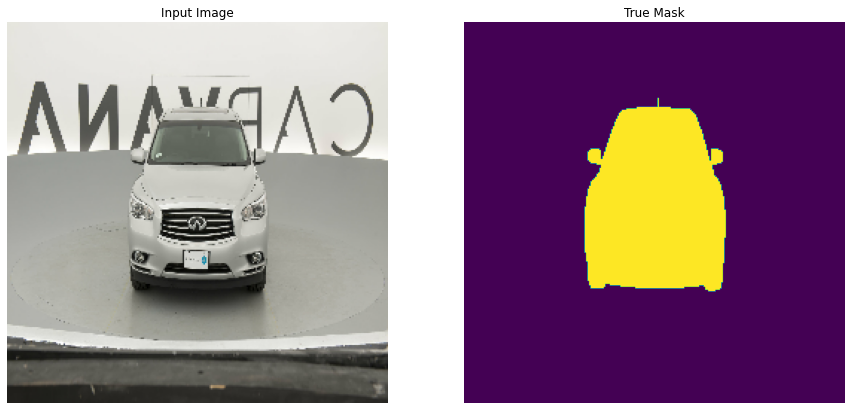

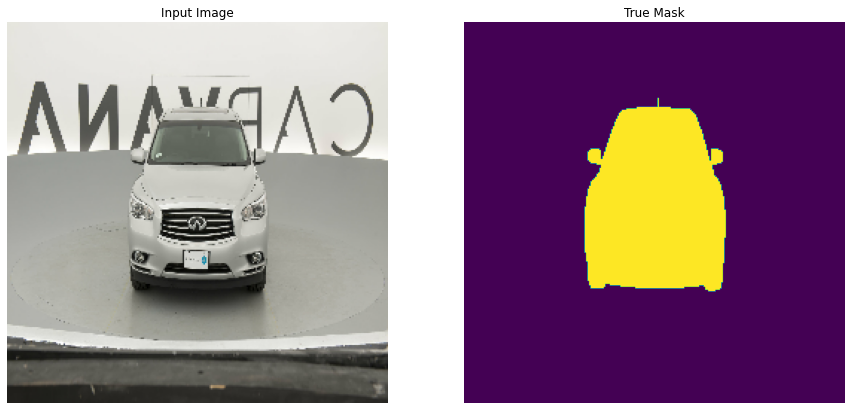

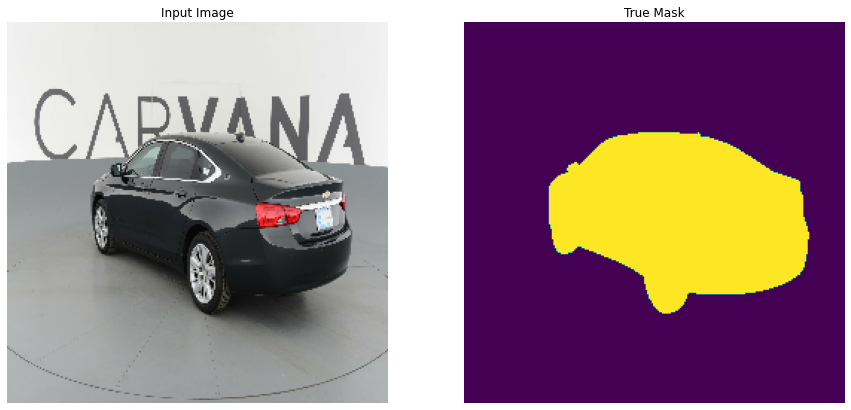

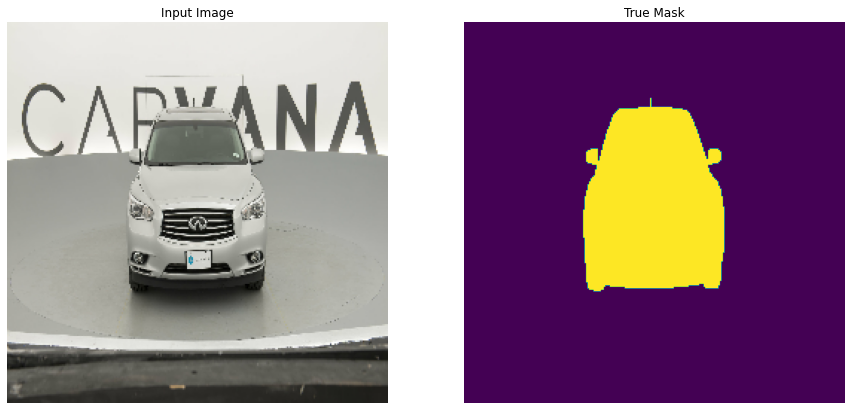

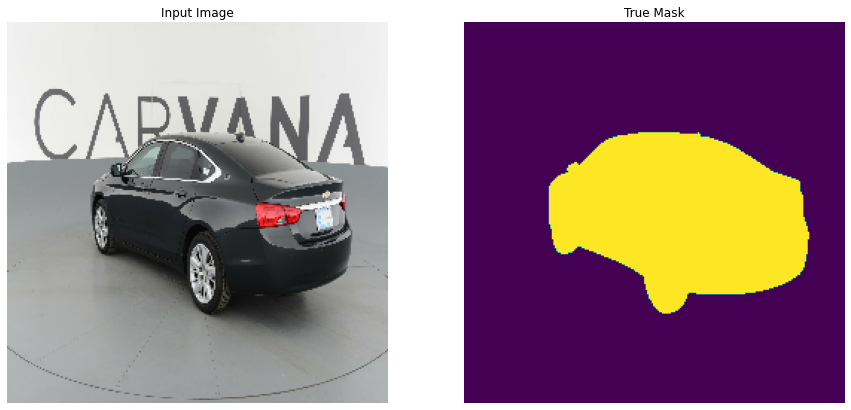

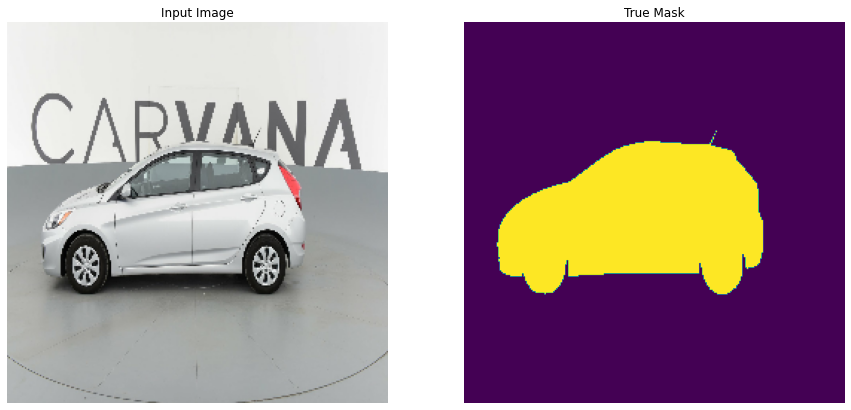

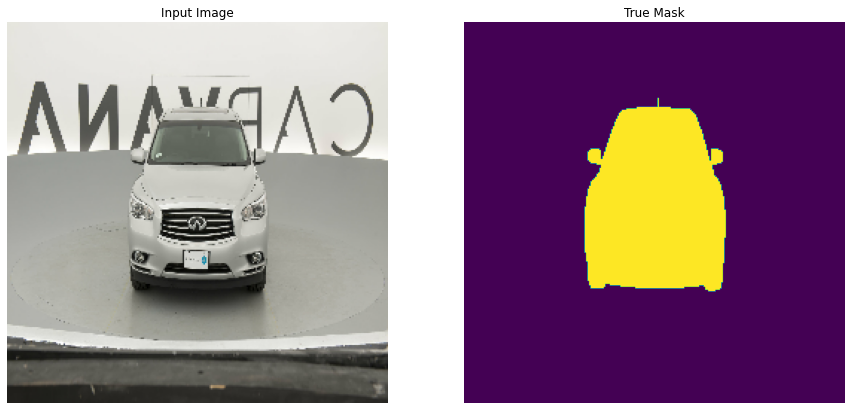

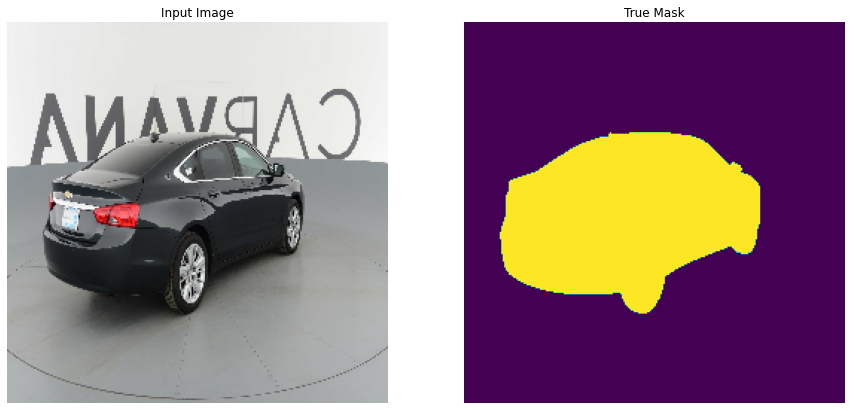

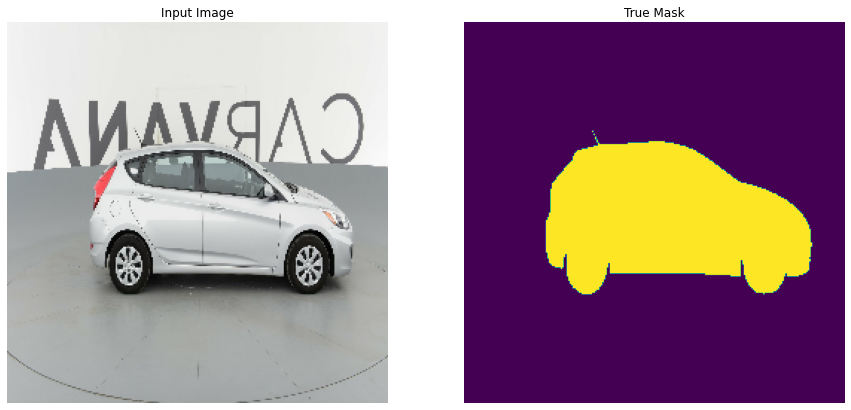

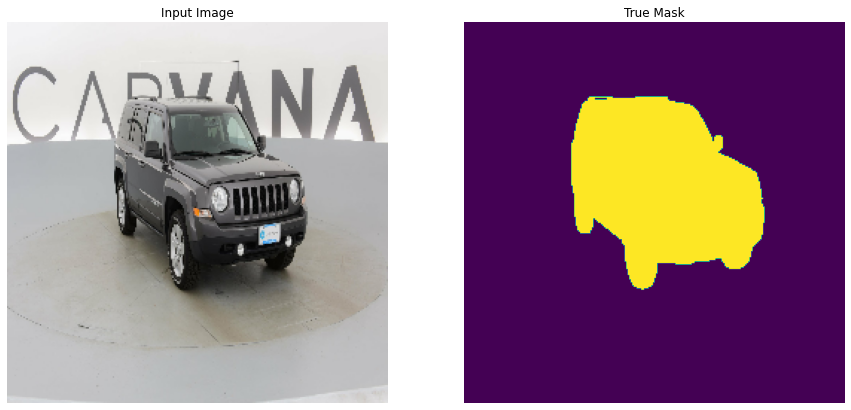

In [17]:
for i in range(5):
   for image, mask in train.take(i):
        sample_image, sample_mask = image, mask
        display([sample_image, sample_mask])

In [18]:
def double_conv_block(x, n_filters):
   # Conv2D then ReLU activation
   x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
   # Conv2D then ReLU activation
   x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
   return x

In [19]:
def downsample_block(x, n_filters):
   f = double_conv_block(x, n_filters)
   p = layers.MaxPool2D(2)(f)
   p = layers.Dropout(0.3)(p)
   return f, p

In [20]:
def upsample_block(x, conv_features, n_filters):
   # upsample
   x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
   # concatenate
   x = layers.concatenate([x, conv_features])
   # dropout
   x = layers.Dropout(0.3)(x)
   # Conv2D twice with ReLU activation
   x = double_conv_block(x, n_filters)
   return x

In [21]:
def  build_unet_model():
    # inputs
   inputs = layers.Input(shape=(256, 256, 3))

   # encoder: contracting path - downsample
   # 1 - downsample
   f1, p1 = downsample_block(inputs, 64)
   # 2 - downsample
   f2, p2 = downsample_block(p1, 128)
   # 3 - downsample
   f3, p3 = downsample_block(p2, 256)
   # 4 - downsample
   f4, p4 = downsample_block(p3, 512)

   # 5 - bottleneck
   bottleneck = double_conv_block(p4, 1024)

   # decoder: expanding path - upsample
   # 6 - upsample
   u6 = upsample_block(bottleneck, f4, 512)
   # 7 - upsample
   u7 = upsample_block(u6, f3, 256)
   # 8 - upsample
   u8 = upsample_block(u7, f2, 128)
   # 9 - upsample
   u9 = upsample_block(u8, f1, 64)

   # outputs
   outputs = layers.Conv2D(3, 1, padding="same", activation = "softmax")(u9)

   # unet model with Keras Functional API
   unet_model = tf.keras.Model(inputs, outputs, name="U-Net")

   return unet_model

In [26]:
unet_model = build_unet_model()

In [27]:
unet_model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss="sparse_categorical_crossentropy",
                  metrics="accuracy")
unet_model.summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [28]:
#early_stop = tf.keras.callbacks.EarlyStopping(patience=4,restore_best_weights=True)

#class DisplayCallback(tf.keras.callbacks.Callback):
#    def on_epoch_begin(self, epoch, logs=None):
#        if (epoch + 1) % 3 == 0:
 #           show_predictions(sample_image, sample_mask)
EPOCHS = 15
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

model_history = unet_model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_data=valid_dataset,
                          callbacks=tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True))

Epoch 1/15
238/238 [==============================] - 309s 1s/step - loss: 0.1371 - accuracy: 0.9460 - val_loss: 0.0335 - val_accuracy: 0.9868
Epoch 2/15
238/238 [==============================] - 261s 1s/step - loss: 0.0320 - accuracy: 0.9879 - val_loss: 0.0214 - val_accuracy: 0.9919
Epoch 3/15
238/238 [==============================] - 255s 1s/step - loss: 0.0199 - accuracy: 0.9926 - val_loss: 0.0142 - val_accuracy: 0.9946
Epoch 4/15
238/238 [==============================] - 274s 1s/step - loss: 0.0254 - accuracy: 0.9907 - val_loss: 0.0138 - val_accuracy: 0.9949
Epoch 5/15
238/238 [==============================] - 255s 1s/step - loss: 0.0129 - accuracy: 0.9951 - val_loss: 0.0108 - val_accuracy: 0.9959
Epoch 6/15
238/238 [==============================] - 274s 1s/step - loss: 0.0111 - accuracy: 0.9957 - val_loss: 0.0092 - val_accuracy: 0.9965
Epoch 7/15
238/238 [==============================] - 274s 1s/step - loss: 0.0096 - accuracy: 0.9963 - val_loss: 0.0084 - val_accuracy: 0.9968

In [29]:
def create_mask(pred_mask):
 pred_mask = tf.argmax(pred_mask, axis=-1)
 pred_mask = pred_mask[..., tf.newaxis]
 return pred_mask[0]
def show_predictions(dataset=None, num=1):
 if dataset:
   for image, mask in dataset.take(num):
     pred_mask = unet_model.predict(image)
     display([image[0], mask[0], create_mask(pred_mask)])
 else:
   display([sample_image, sample_mask,
            create_mask(model.predict(sample_image[tf.newaxis, ...]))])
count = 0
for i in valid_dataset:
   count +=1
print("number of batches:", count)

number of batches: 80


1/1 [==============================] - 1s 545ms/step


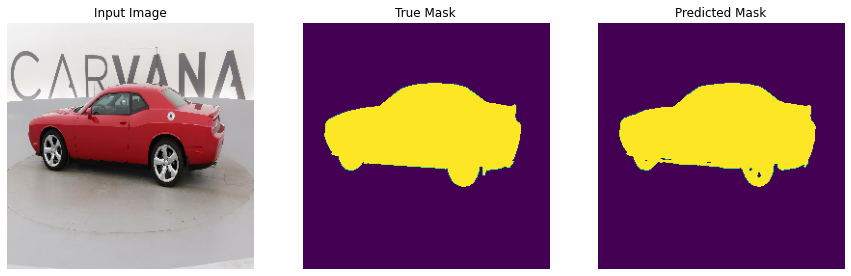

1/1 [==============================] - 0s 75ms/step


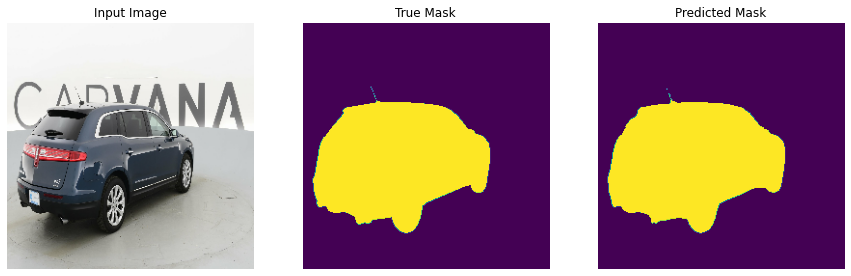

1/1 [==============================] - 0s 85ms/step


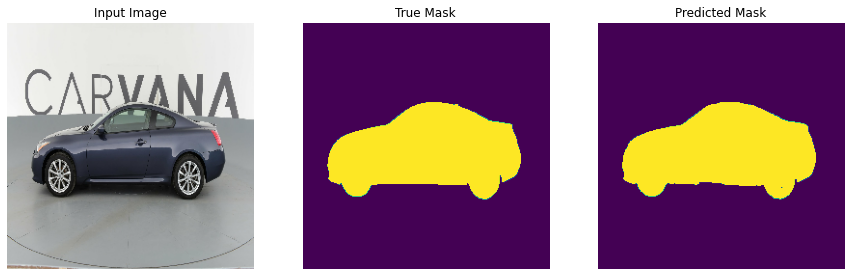

1/1 [==============================] - 0s 71ms/step


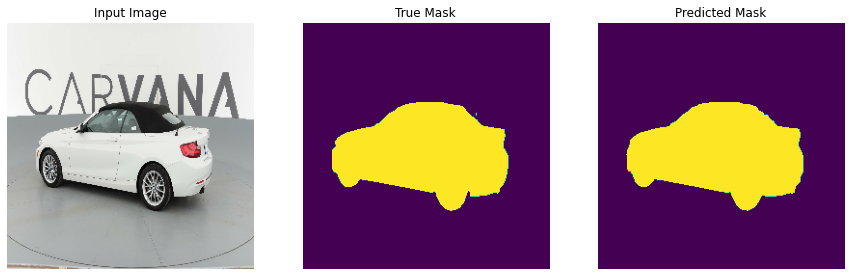

1/1 [==============================] - 0s 33ms/step


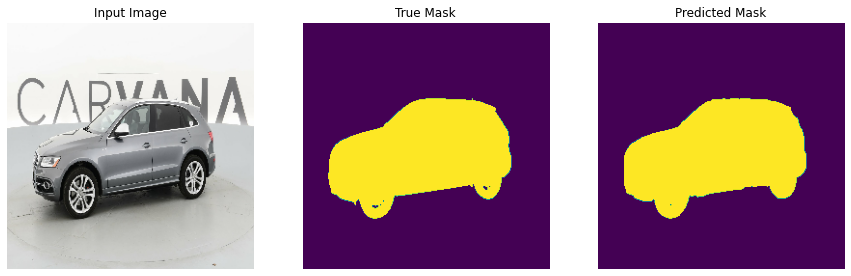

In [30]:
show_predictions(valid_dataset,5)

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
unet_model.save('/content/drive/MyDrive/SavedModels/image-segmentation-unet_cars.h5')